# Идентификация личности по манере набора текста.

## Глава 1. Отбор параметров.

### Основные определения.
Внутренним расстоянием будем называть промежуток времени прошедший между нажатием и отпусканием клавиши. Иначе говоря - 
это время в течении котороко клавиша удерживалась нажатой.

Внешним расстоянием будем называть промежуток времени прошедший между отпусканием n-й клавиши и нажатием (n + 1)-й.

Определения математического ожидания и дисперсии можно найти в любом учебнике по теории вероятростей и математической статистике.

### Внутренние расстояния.

Сначала попробуем посмотреть характеризует ли пользователя длительность удержания клавиши нажатой.

In [2]:
from db_provider import Provider

from utils import get_inputs_sequence
import matplotlib.pyplot as plt
%matplotlib inline

provider = Provider("database/research_db.sqlite3")

subjects = provider.get_all_subjects()
inputs_sequence_dict = dict()

for subject in subjects:
    inputs_sequence_dict[subject] = get_inputs_sequence(
        provider.get_all_units_by_subject_id(
            subject
        ), is_raw=True
    )

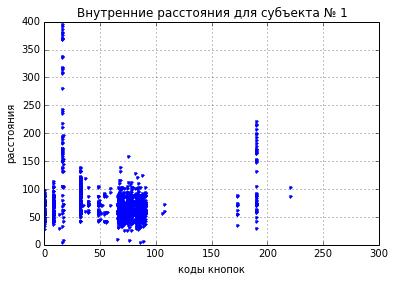

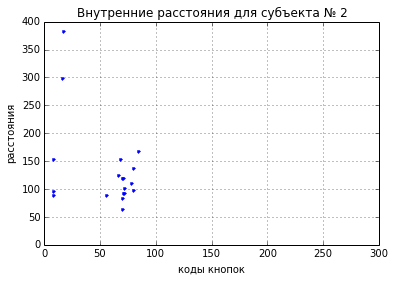

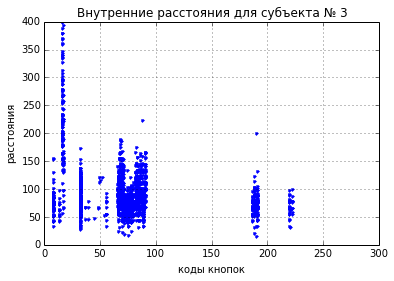

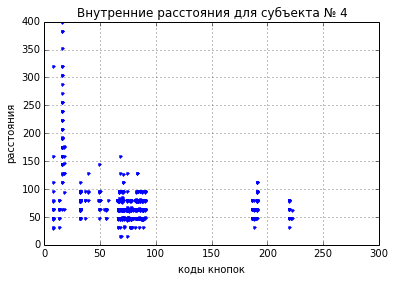

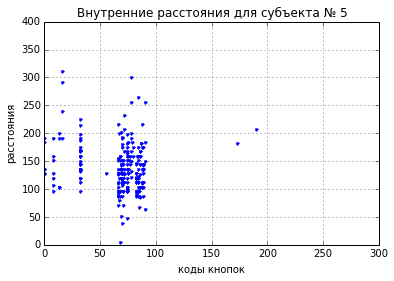

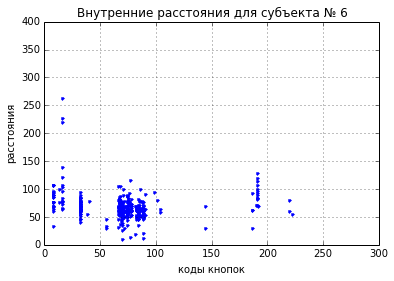

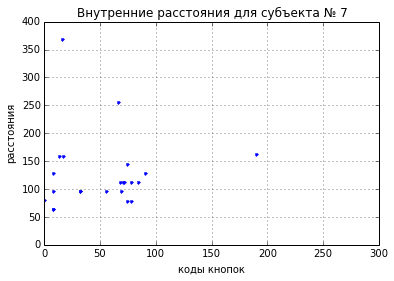

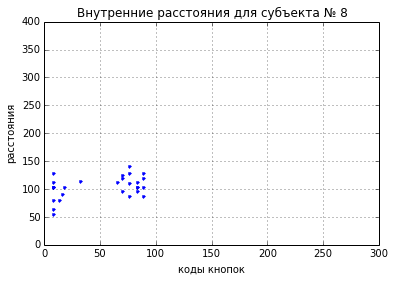

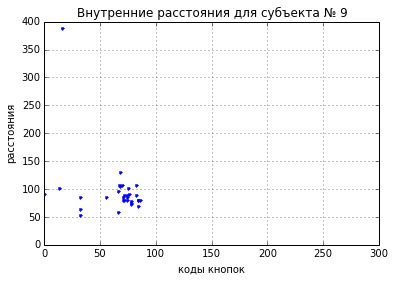

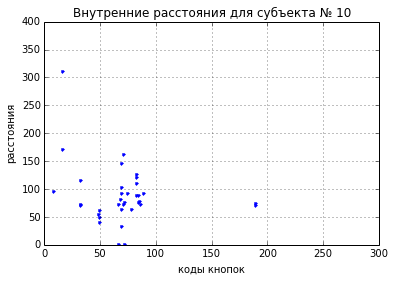

In [3]:
from chapter_one.utils import get_inner_distance_sequence

for subject in subjects:
    ids = get_inner_distance_sequence(
        inputs_sequence_dict[subject]
    )
    x = []
    y = []
    for inner_distance in ids:
        x.append(inner_distance.key_code)
        y.append(inner_distance.distance)
    plt.axis([0,300,0,400])
    plt.plot(x, y, 'b.')
    plt.title("Внутренние расстояния для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("расстояния")
    plt.grid(True)
    plt.show()

Теперь рассмотрим как себя ведут математические ожидания.

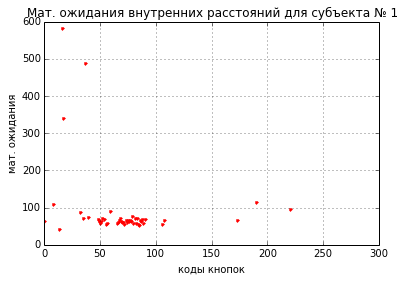

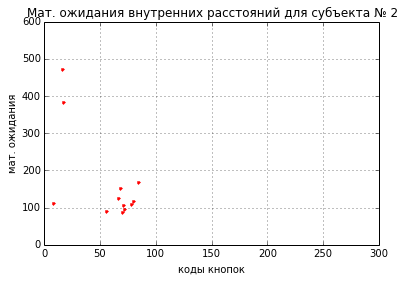

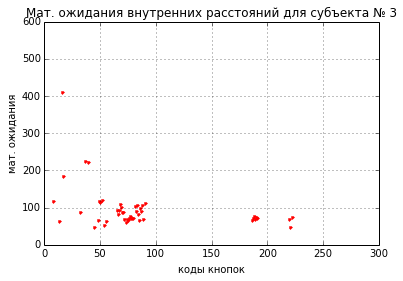

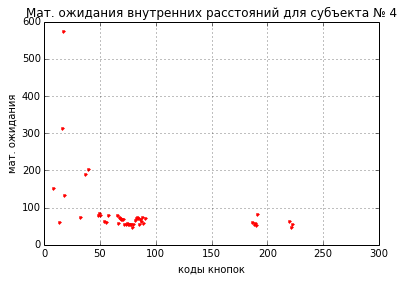

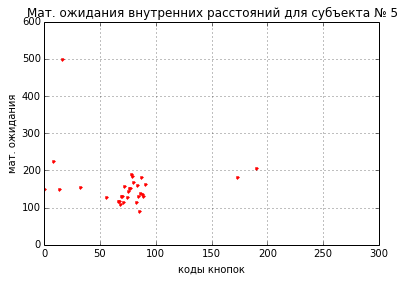

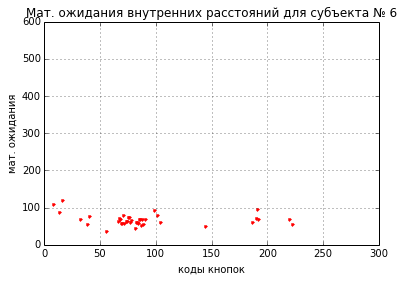

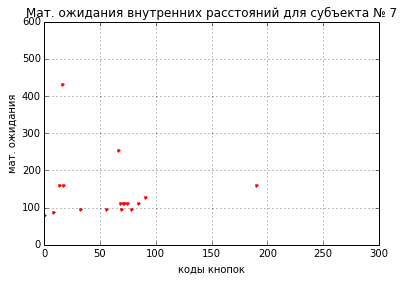

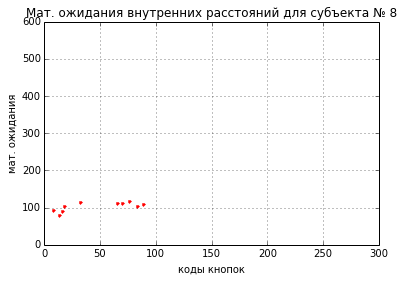

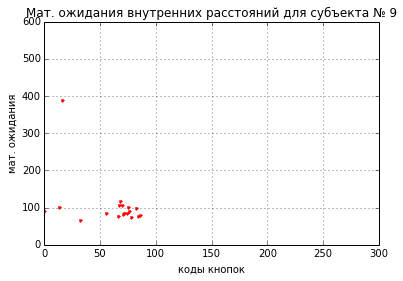

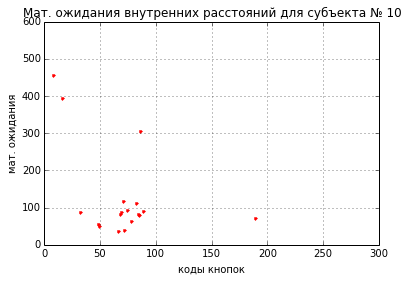

In [4]:
from chapter_one.utils import get_average_inner_distance

for subject in subjects:
    aids = get_average_inner_distance(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for aid in aids:
        x.append(aid.key_code)
        y.append(aid.distance)
    plt.plot(x, y, 'r.')
    plt.axis([0,300,0,600])
    plt.title("Мат. ожидания внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("мат. ожидания")
    plt.grid(True)
    plt.show()

Теперь рассмотрим дисперсии.

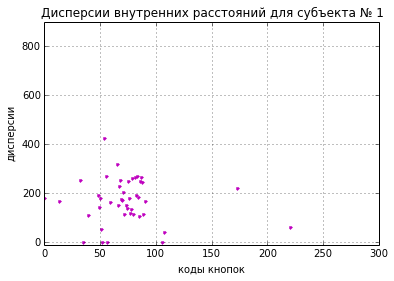

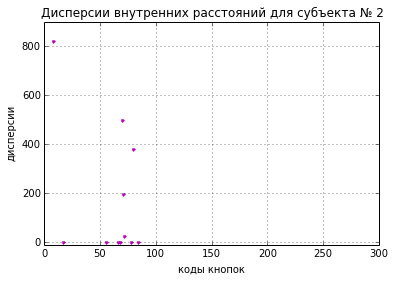

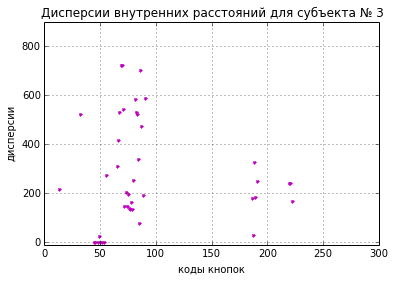

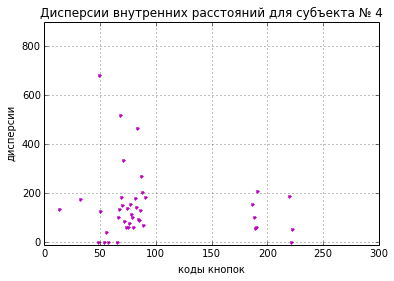

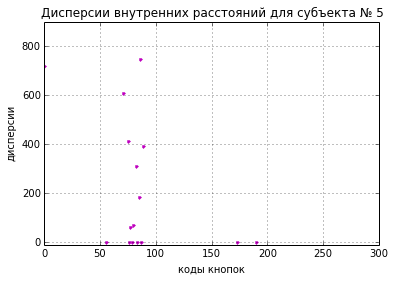

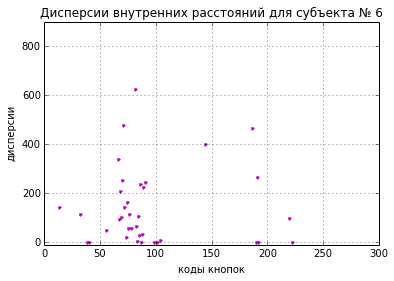

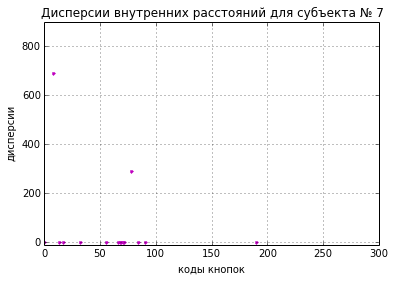

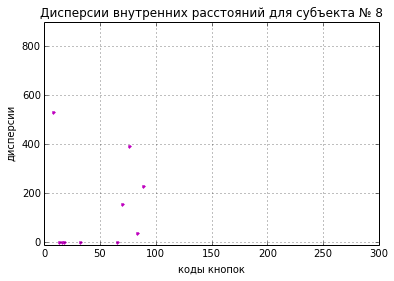

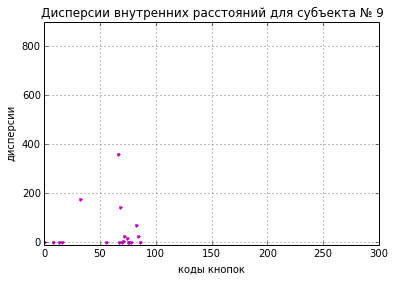

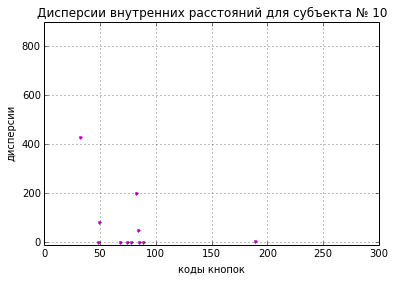

In [5]:
from chapter_one.utils import get_inner_distance_dispersion

for subject in subjects:
    idds = get_inner_distance_dispersion(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for idd in idds:
        x.append(idd.key_code)
        y.append(idd.distance)
    plt.plot(x, y, 'm.')
    plt.axis([0,300,-10,900])
    plt.title("Дисперсии внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()

среднеквадратическое отклонение:

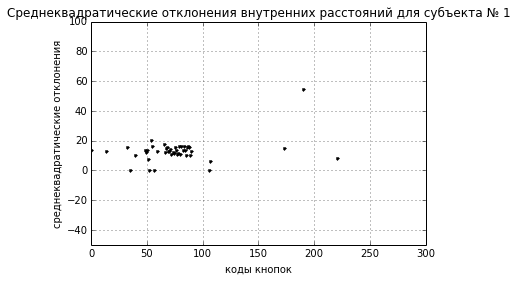

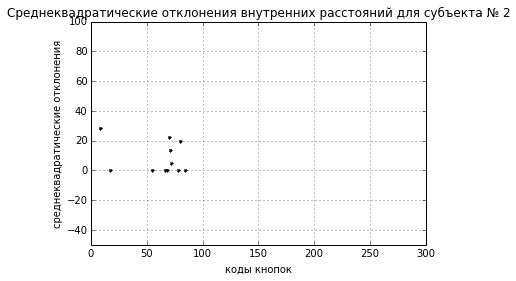

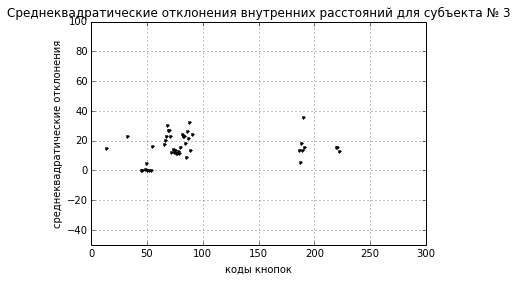

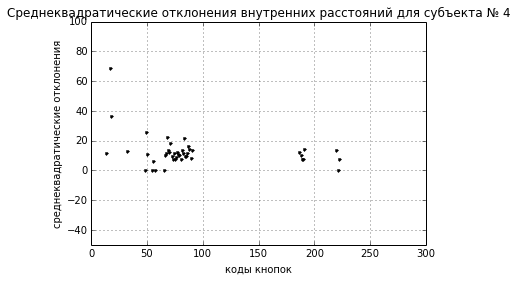

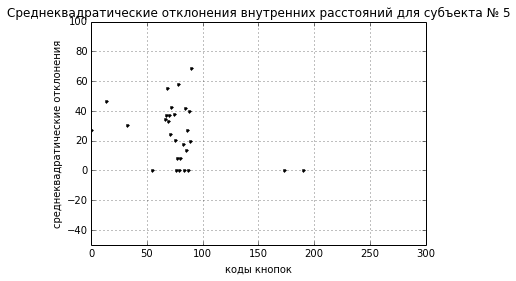

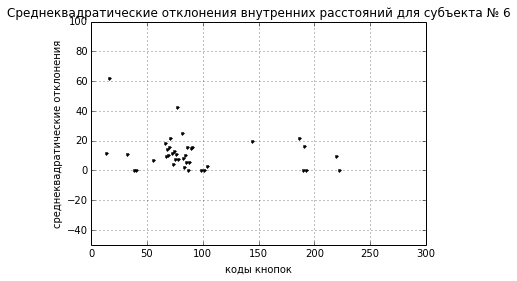

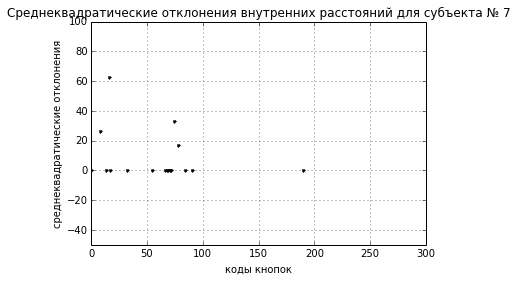

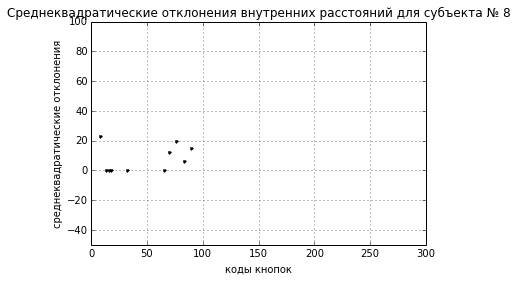

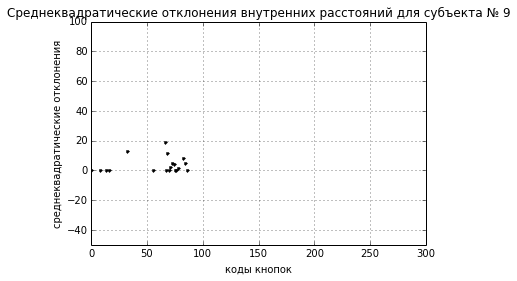

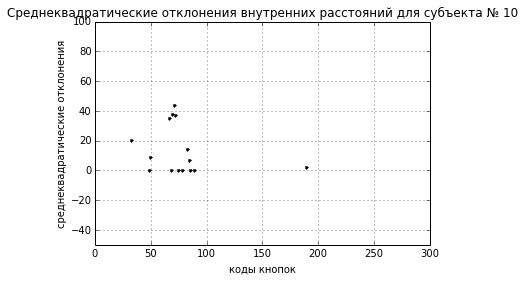

In [11]:
from chapter_one.utils import get_inner_distance_standard_deviation

for subject in subjects:
    idsds = get_inner_distance_standard_deviation(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for idsd in idsds:
        x.append(idsd.key_code)
        y.append(idsd.distance)
    plt.plot(x, y, 'k.')
    plt.axis([0,300,-50,100])
    plt.title("Среднеквадратические отклонения внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("среднеквадратические отклонения")
    plt.grid(True)
    plt.show()

Из графиков приведенных выше видно, что для каждого пользователя существуют клавиши для которых дисперсия очень близка к нулю. А это значит, что внутренние расстояния для этих клавиш вполне могут подойти как признаки, по которым можно классифицировать субъект.

### Внешние расстояния.
Рассмотрим как себя ведут внешние расстояния.

In [8]:
from chapter_one.utils import get_outer_distance_sequence

keys_number = 250

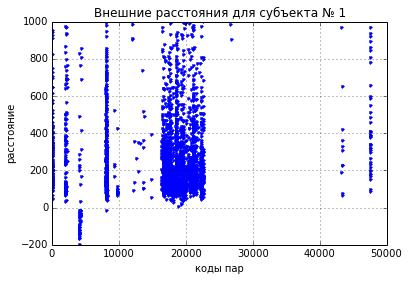

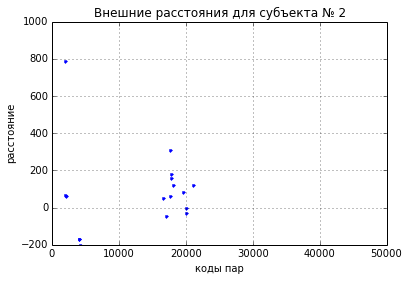

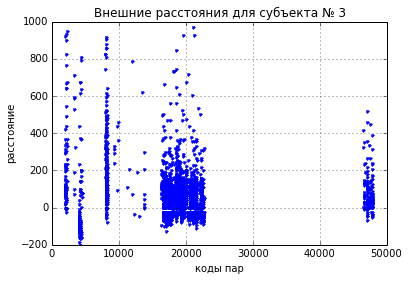

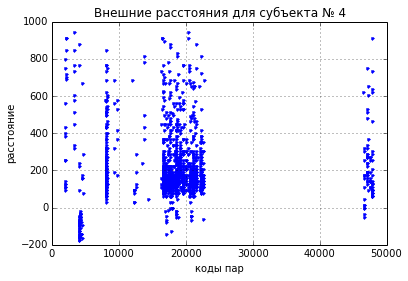

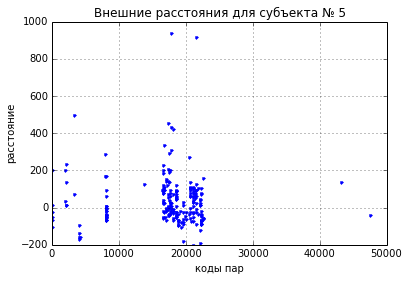

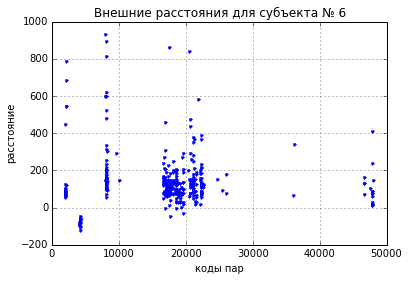

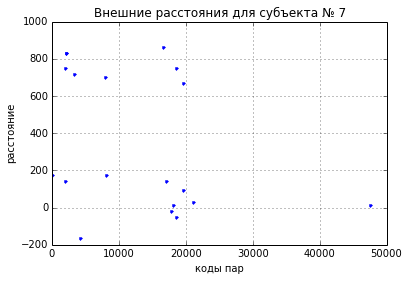

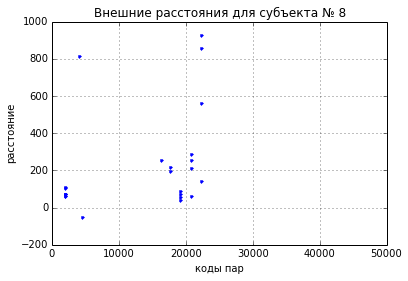

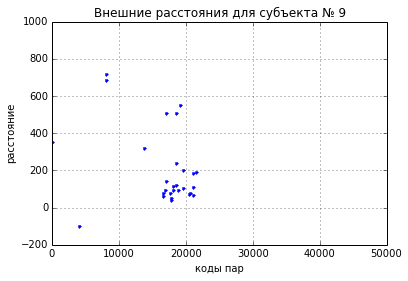

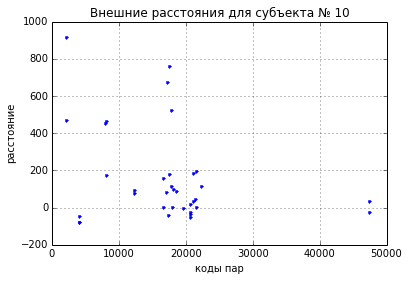

In [12]:
for subject in subjects:
    ods = get_outer_distance_sequence(
        inputs_sequence_dict[subject]
    )
    x = []
    y = []
    for d in ods:
        x.append(d.key_code_from * keys_number + d.key_code_to)
        y.append(d.distance)
    plt.axis([0,50000,-200,1000])
    plt.plot(x, y, 'b.')
    plt.title("Внешние расстояния для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("расстояние")
    plt.grid(True)
    plt.show()

Мат. ожидания:

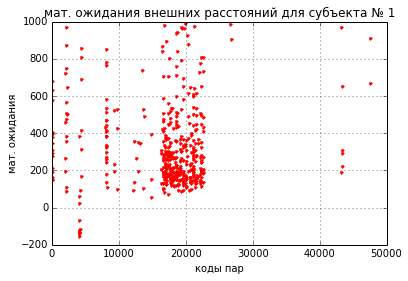

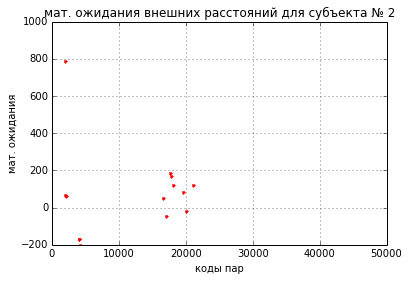

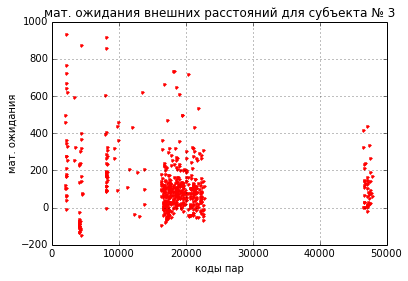

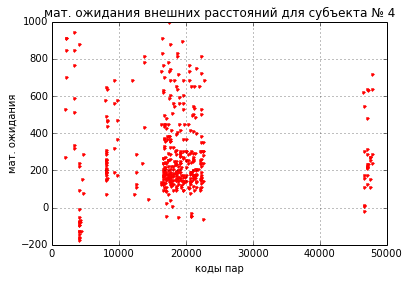

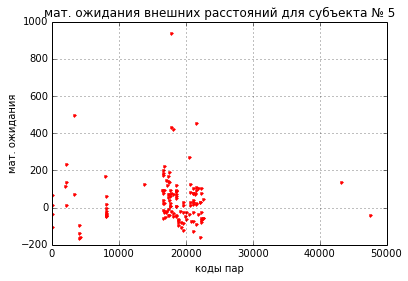

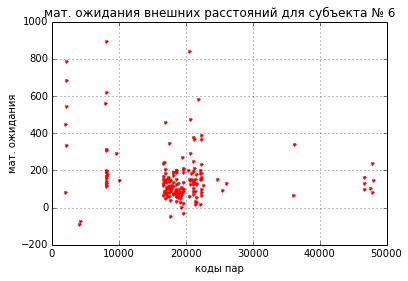

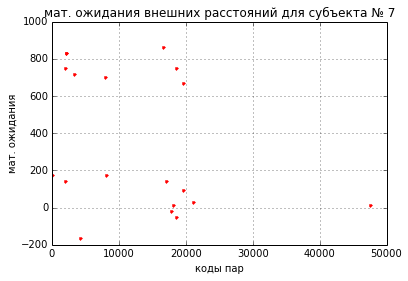

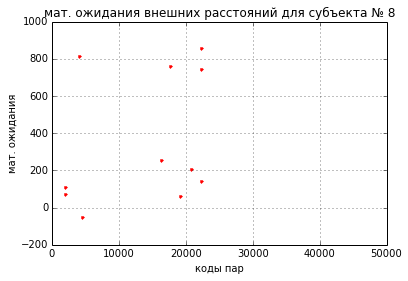

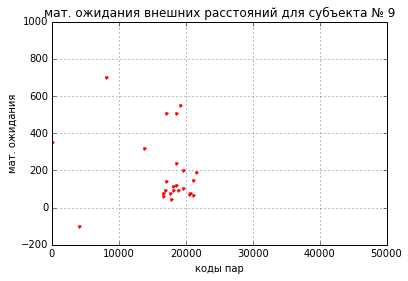

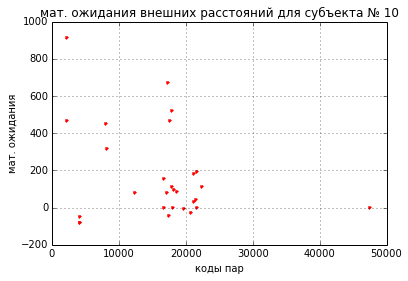

In [13]:
from chapter_one.utils import get_average_outer_distance

for subject in subjects:
    aods = get_average_outer_distance(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for ad in aods:
        x.append(ad.key_code_from * keys_number + ad.key_code_to)
        y.append(ad.distance)
    plt.axis([0,50000,-200,1000])
    plt.plot(x, y, 'r.')
    plt.title("мат. ожидания внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("мат. ожидания")
    plt.grid(True)
    plt.show()

дисперсии:

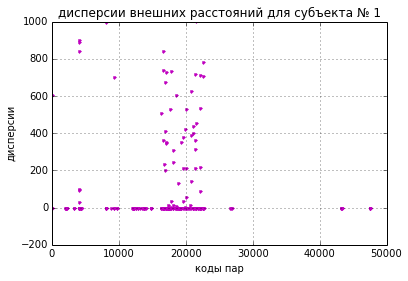

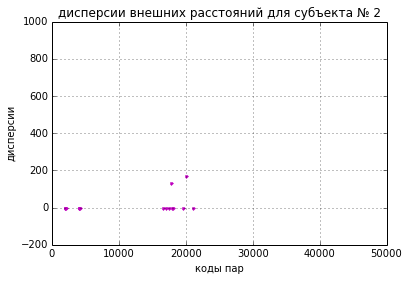

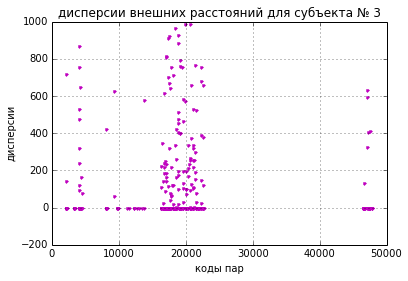

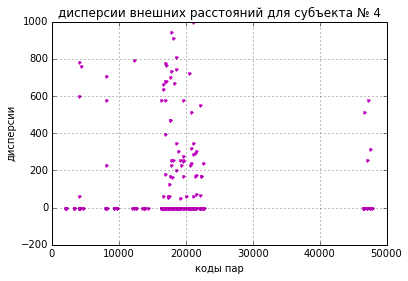

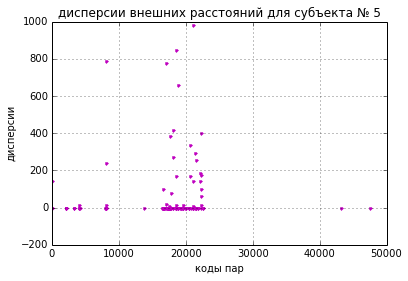

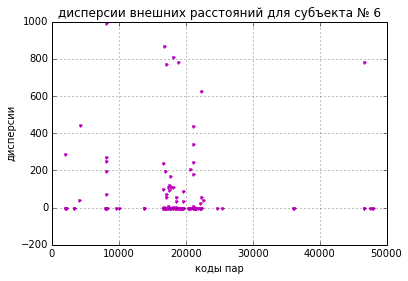

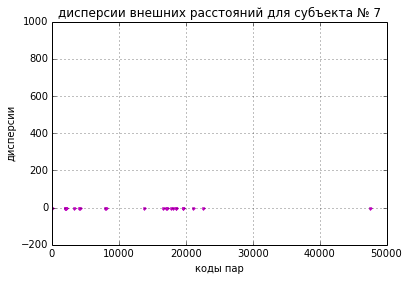

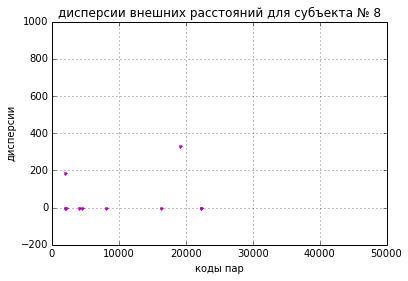

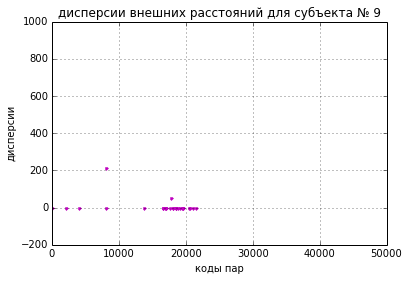

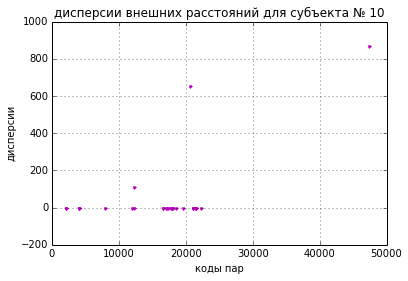

In [14]:
from chapter_one.utils import get_outer_distance_dispersion

for subject in subjects:
    odds = get_outer_distance_dispersion(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for odd in odds:
        x.append(odd.key_code_from * keys_number + odd.key_code_to)
        y.append(odd.distance)
    plt.axis([0,50000,-200,1000])
    plt.plot(x, y, 'm.')
    plt.title("дисперсии внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()

среднеквадратическое отклонение: 

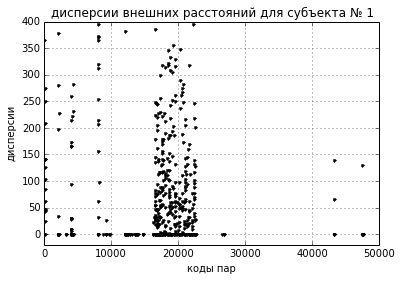

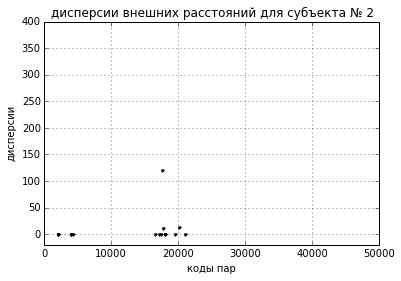

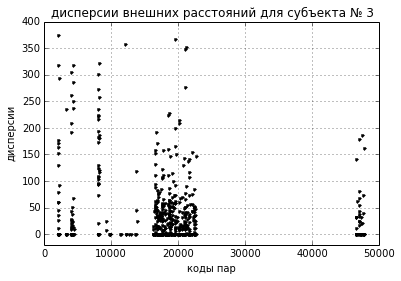

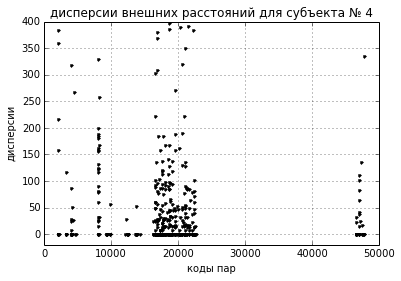

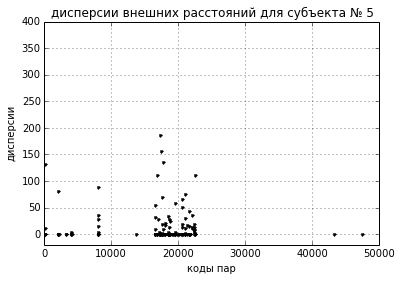

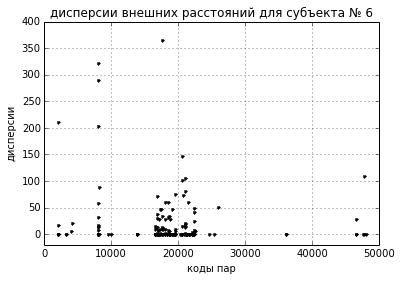

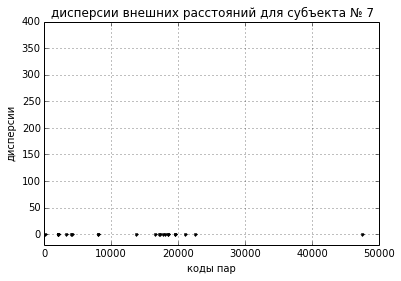

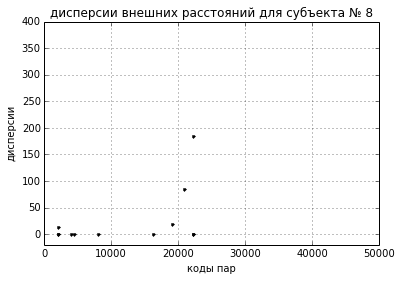

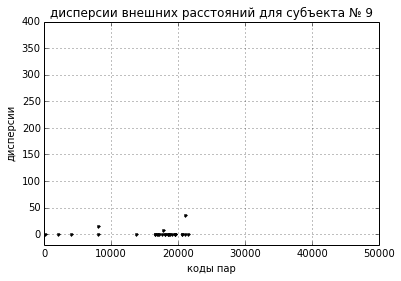

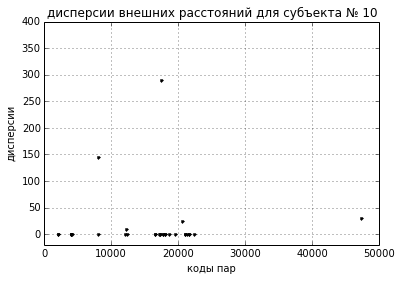

In [17]:
from chapter_one.utils import get_outer_distance_standard_deviation

for subject in subjects:
    odsds = get_outer_distance_standard_deviation(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for odsd in odsds:
        x.append(odsd.key_code_from * keys_number + odsd.key_code_to)
        y.append(odsd.distance)
    plt.axis([0,50000,-20,400])
    plt.plot(x, y, 'k.')
    plt.title("дисперсии внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()

В случае внешних расстояний, клавишь для которых дисперсии равны нулю стало еще больше. Скорее всего этот признак и окажется "рабочей лошадкой".